In [19]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline



a_d=[] #for the angular diameter
with open('diameters.csv','r') as f:
    lines=f.read().split('\n')
for line in lines:
    a_d.append(line.split(','))
data=np.loadtxt('data.txt',delimiter=',')
data_g=np.copy(data)

print("The reading the data from the diameters csv files containing 27 galaxies and the data.txt file with spectral wavelengths")



The reading the data from the diameters csv files containing 27 galaxies and the data.txt file with spectral wavelengths


In [20]:
avg_rs=[] #list to save the redshift for each of the galaxy
for i in range(0,26):
    data_g[i][0]=(data_g[i][0]-3933.7)/3933.7
    data_g[i][1]=(data_g[i][1]-3968.5)/3968.5
    data_g[i][2]=(data_g[i][2]-6562.8)/6562.8
    m=round( (data_g[i][0]+data_g[i][1]+data_g[i][2])/3,4)
    avg_rs.append(m)
print("Calculating the average redshifts of ecach galaxy")

Calculating the average redshifts of ecach galaxy


In [23]:
v_g=[] #list to store the velocity
c=299792.458 #speed of light in km/s
for i in range(0,26):
    v_g.append(c*avg_rs[i])

d=[]
for i in range(0,26):
    d.append(22/float(a_d[i][1]))
    
d.sort()
v_g.sort()


In [24]:
print("The redshifts of galaxies are")
print(avg_rs) 


The redshifts of galaxies are
[0.0072, 0.0066, 0.0078, 0.0049, 0.0011, 0.0005, 0.0088, 0.0049, 0.0051, 0.006, 0.0032, 0.0043, 0.0064, 0.0032, 0.0024, 0.0042, 0.0049, 0.0022, 0.0056, 0.0032, 0.0097, 0.0022, 0.0078, 0.0041, 0.0046, 0.0078]


In [25]:
print("The velocities of galaxies are")
print(v_g) 


The velocities of galaxies are
[149.896229, 329.7717038, 659.5434076, 659.5434076, 719.5018991999999, 959.3358656, 959.3358656, 959.3358656, 1229.1490778, 1259.1283236, 1289.1075693999999, 1379.0453068, 1468.9830441999998, 1468.9830441999998, 1468.9830441999998, 1528.9415358, 1678.8377647999998, 1798.7547479999998, 1918.6717312, 1978.6302228, 2158.5056975999996, 2338.3811723999997, 2338.3811723999997, 2338.3811723999997, 2638.1736304, 2907.9868426]


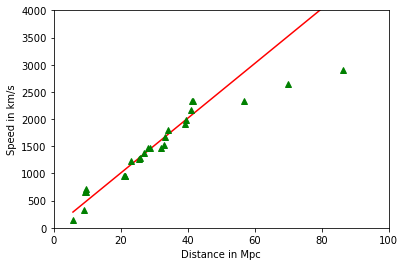

In [15]:
xd=d
yd=v_g

par = np.polyfit(xd, yd, 1, full=True)

slope=av_h
intercept=0
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),s=' ')

plt.xlabel("Distance in Mpc")
plt.ylabel("Speed in km/s")

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
plt.xlim(0,100,5)
plt.ylim(0,4000,500)
plt.plot(xl, yl, '-r')
plt.plot(d,v_g,'g^')
#plt.plot(xd, yerrLower, '--r')
#plt.plot(xd, yerrUpper, '--r')
plt.show()

In [16]:
h_val=[]
for i in range(0,25):
    h_val.append((v_g[i]/d[i]))
     
av_h=sum(h_val)/len(h_val)
m=np.max(h_val)
print("the value of hubble constant is %s "%m) 
print("Age of universe in %s "%(1/m))




the value of hubble constant is 73.87976319512727 
Age of universe in 0.013535506297696889 
